<a href="https://colab.research.google.com/github/SyedHarshath/Computer-Vision/blob/main/Image_Restoration_and_Edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

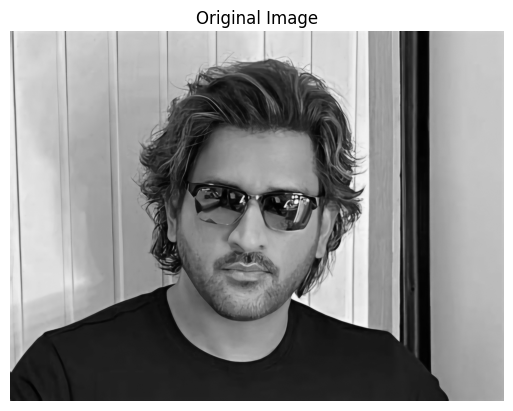

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/MSD.jpeg")

image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray,cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

In [2]:
### Edge Detection

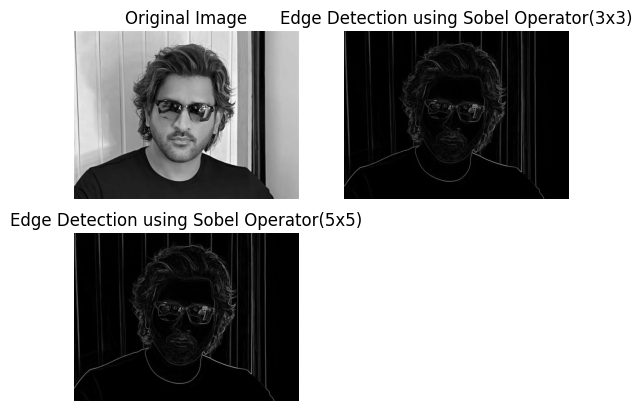

In [3]:
blurred_image = cv2.GaussianBlur(image_gray, (5, 5), 1)

Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
rows,cols = image_gray.shape

Gx1 = np.array([[-1,-2,0,2,1],[-2,-3,0,3,2],[-3,-5,0,5,3],[-2,-3,0,3,2],[-1,-2,0,2,1]])
Gy1 = np.array([[1,2,3,2,1],[2,3,5,3,2],[0,0,0,0,0],[-2,-3,-5,-3,-2],[-1,-2,-3,-2,-1]])

gradient_x = np.zeros((rows-2,cols-2))
gradient_y = np.zeros((rows-2,cols-2))
gradient_magnitude = np.zeros((rows-2,cols-2))
for i in range(1,rows-1):
    for j in range(1,cols-1):
        region = blurred_image[i-1:i+2,j-1:j+2]
        gx = np.sum(Gx*region)
        gy = np.sum(Gy*region)
        gradient_x[i-1,j-1] = gx
        gradient_y[i-1,j-1] = gy
        gradient_magnitude[i-1,j-1] = np.sqrt(gx**2 + gy**2)
gradient_magnitude = (gradient_magnitude/gradient_magnitude.max()) * 255.0
gradient_magnitude = gradient_magnitude.astype(np.uint8)

gradient_x1 = np.zeros((rows-4,cols-4))
gradient_y1 = np.zeros((rows-4,cols-4))
gradient_magnitude1 = np.zeros((rows-4,cols-4))

for i in range(2,rows-2):
    for j in range(2,cols-2):

        region1 = blurred_image[i-2:i+3, j-2:j+3]  # 5x5 region
        gx1 = np.sum(Gx1*region1)
        gy1 = np.sum(Gy1*region1)
        gradient_x1[i-2,j-2] = gx1
        gradient_y1[i-2,j-2] = gy1
        gradient_magnitude1[i-2,j-2] = np.sqrt(gx1**2 + gy1**2)

gradient_magnitude1 = (gradient_magnitude1/gradient_magnitude1.max()) * 255.0
gradient_magnitude1 = gradient_magnitude1.astype(np.uint8)

plt.subplot(2,2,1)
plt.imshow(image_gray,cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(gradient_magnitude,cmap='gray')
plt.title("Edge Detection using Sobel Operator(3x3)")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(gradient_magnitude1,cmap='gray')
plt.title("Edge Detection using Sobel Operator(5x5)")
plt.axis("off")
plt.show()

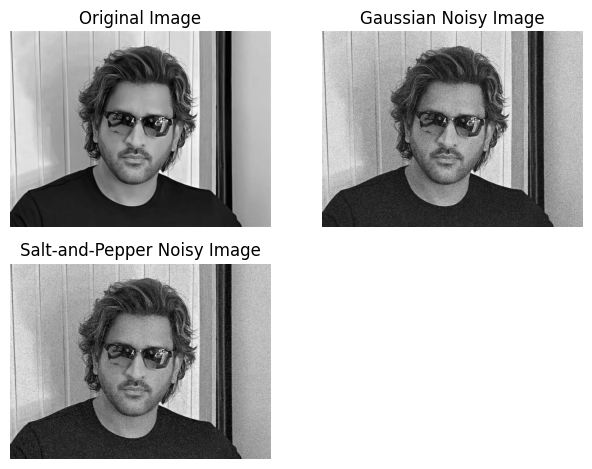

In [5]:
## Image Restoration

### Spatial Filtering

def add_gaussian_noise(image, mean,var):
    row,col = image.shape
    #sigma = np.sqrt(var)
    gaussian_noise = np.random.normal(mean,var,(row,col))
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image,0,255)
    return noisy_image

gaussian_noisy = add_gaussian_noise(image_gray,mean=0,var=50)

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.shape[0] * image.shape[1]
    num_salt = int(total_pixels * salt_prob)
    for _ in range(num_salt):
        i = np.random.randint(0, image.shape[0])
        j = np.random.randint(0, image.shape[1])
        noisy_image[i, j] = 255
    num_pepper = int(total_pixels * pepper_prob)
    for _ in range(num_pepper):
        i = np.random.randint(0, image.shape[0])
        j = np.random.randint(0, image.shape[1])
        noisy_image[i, j] = 0
    return noisy_image
sp_noisy_image = add_salt_and_pepper_noise(image_gray, salt_prob=0.05, pepper_prob=0.05)

plt.subplot(2,2,1)
plt.imshow(image_gray, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(gaussian_noisy,cmap='gray')
plt.title("Gaussian Noisy Image")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(sp_noisy_image, cmap="gray")
plt.title("Salt-and-Pepper Noisy Image")
plt.axis("off")
plt.tight_layout()
plt.show()

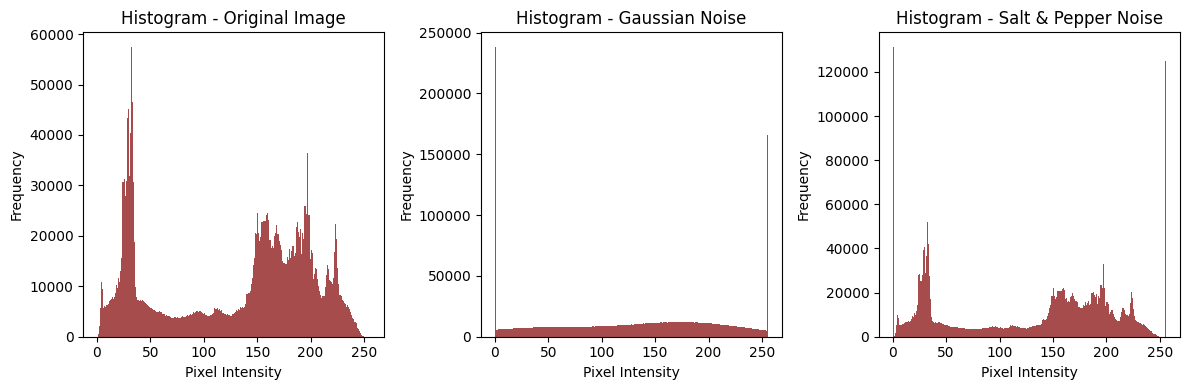

In [6]:
import seaborn as sns

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(image_gray.ravel(), bins=256, range=[0, 256], color='maroon', alpha=0.7)
plt.title("Histogram - Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(gaussian_noisy.ravel(), bins=256, range=[0, 256], color='maroon', alpha=0.7)
plt.title("Histogram - Gaussian Noise")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.hist(sp_noisy_image.ravel(), bins=256, range=[0, 256], color='maroon', alpha=0.7)
plt.title("Histogram - Salt & Pepper Noise")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


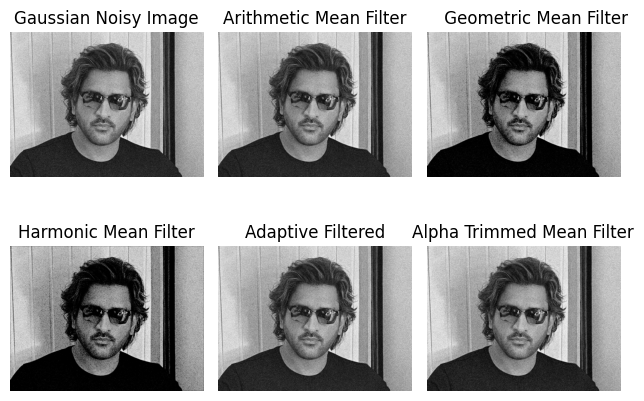

In [7]:
def arithmetic_mean_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='reflect')
    result = np.zeros_like(image, dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+kernel_size, j:j+kernel_size]
            result[i, j] = np.mean(window)
    return result

def geometric_mean_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='reflect')
    result = np.zeros_like(image, dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+kernel_size, j:j+kernel_size]
            result[i, j] = np.exp(np.mean(np.log(window + 1e-5)))
    return result

def harmonic_mean_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded_img = np.pad(image, pad_size, mode='constant', constant_values=1)
    filtered_img = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_img[i:i+kernel_size, j:j+kernel_size]
            filtered_img[i, j] = (kernel_size * kernel_size) / np.sum(1.0 / (neighborhood + 1e-5))
    return filtered_img.astype(np.uint8)

def adaptive_local_noise_reduction_filter(image, noise_variance, kernel_size=3):
    pad_size = kernel_size // 2
    padded_img = np.pad(image, pad_size, mode='constant', constant_values=0)
    filtered_img = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_img[i:i+kernel_size, j:j+kernel_size]
            local_mean = np.mean(neighborhood)
            local_var = np.var(neighborhood)
            if local_var == 0:
                filtered_img[i, j] = image[i, j]
            else:
                filtered_img[i, j] = image[i, j] - (noise_variance / local_var) * (image[i, j] - local_mean)
    return filtered_img.astype(np.uint8)

def alpha_trimmed_mean_filter(image, kernel_size=3, d=2):
    pad_size = kernel_size // 2
    padded_img = np.pad(image, pad_size, mode='reflect')
    filtered_img = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_img[i:i+kernel_size, j:j+kernel_size].flatten()
            sorted_values = np.sort(neighborhood)
            if d > 0 and d < len(sorted_values):
                trimmed_values = sorted_values[d//2 : -d//2]
            else:
                trimmed_values = sorted_values
            filtered_img[i, j] = np.mean(trimmed_values)
    return filtered_img.astype(np.uint8)

arithmetic = arithmetic_mean_filter(gaussian_noisy,kernel_size=3)

geometric = geometric_mean_filter(gaussian_noisy,kernel_size=3)

harmonic = harmonic_mean_filter(gaussian_noisy,kernel_size=3)

adaptive_filtered = adaptive_local_noise_reduction_filter(gaussian_noisy, noise_variance=100, kernel_size=3)

alpha_trimmed = alpha_trimmed_mean_filter(gaussian_noisy, kernel_size=3, d=2)

plt.subplot(2,3,1)
plt.imshow(gaussian_noisy,cmap='gray')
plt.title("Gaussian Noisy Image")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(arithmetic,cmap='gray')
plt.title("Arithmetic Mean Filter")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(geometric,cmap='gray')
plt.title("     Geometric Mean Filter")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(harmonic,cmap='gray')
plt.title("Harmonic Mean Filter")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(adaptive_filtered, cmap="gray")
plt.title("Adaptive Filtered")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(alpha_trimmed, cmap="gray")
plt.title("Alpha Trimmed Mean Filter")
plt.axis("off")
plt.tight_layout()
plt.show()

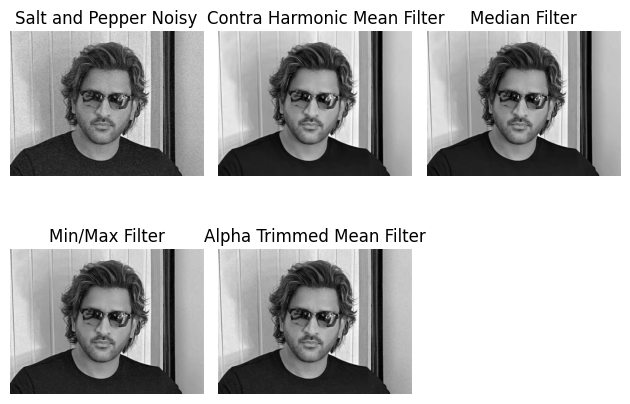

In [8]:
def adaptive_contra_harmonic_mean_filter(image, kernel_size=5):
    image = cv2.medianBlur(image, 3)
    pad_size = kernel_size // 2
    padded_img = np.pad(image, pad_size, mode='reflect').astype(np.float32)
    filtered_img = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_img[i:i+kernel_size, j:j+kernel_size]
            salt_count = np.sum(neighborhood == 255)
            pepper_count = np.sum(neighborhood == 0)
            total_noise = salt_count + pepper_count + 1e-5
            noise_ratio = salt_count / total_noise
            Q = -2 * noise_ratio + 2 * (1 - noise_ratio)
            neighborhood = np.where(neighborhood == 0, 1e-5, neighborhood)
            num = np.sum(np.power(neighborhood, Q + 1))
            den = np.maximum(np.sum(np.power(neighborhood, Q)), 1e-5)
            filtered_img[i, j] = num / den
    return np.clip(filtered_img, 0, 255).astype(np.uint8)

def median_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded_img = np.pad(image, pad_size, mode='constant', constant_values=0)
    filtered_img = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_img[i:i+kernel_size, j:j+kernel_size]
            filtered_img[i, j] = np.median(neighborhood)

    return filtered_img.astype(np.uint8)

def adaptive_min_max_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded_img = np.pad(image, pad_size, mode='reflect')
    filtered_img = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_img[i:i+kernel_size, j:j+kernel_size]
            if image[i, j] == 0:
                filtered_img[i, j] = np.max(neighborhood)
            elif image[i, j] == 255:
                filtered_img[i, j] = np.min(neighborhood)
            else:
                filtered_img[i, j] = image[i, j]
    return filtered_img.astype(np.uint8)
min_max_filter = adaptive_min_max_filter(sp_noisy_image, kernel_size=3)

contra_harmonic = adaptive_contra_harmonic_mean_filter(sp_noisy_image,kernel_size=5)

median_filtered = median_filter(sp_noisy_image, kernel_size=3)

alpha_trimmed = alpha_trimmed_mean_filter(sp_noisy_image, kernel_size=3, d=2)

plt.subplot(2,3,1)
plt.imshow(sp_noisy_image,cmap='gray')
plt.title("Salt and Pepper Noisy")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(contra_harmonic,cmap='gray')
plt.title("    Contra Harmonic Mean Filter")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(median_filtered,cmap='gray')
plt.title("Median Filter")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(min_max_filter,cmap='gray')
plt.title("Min/Max Filter")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(alpha_trimmed, cmap="gray")
plt.title("Alpha Trimmed Mean Filter")
plt.axis("off")
plt.tight_layout()
plt.show()


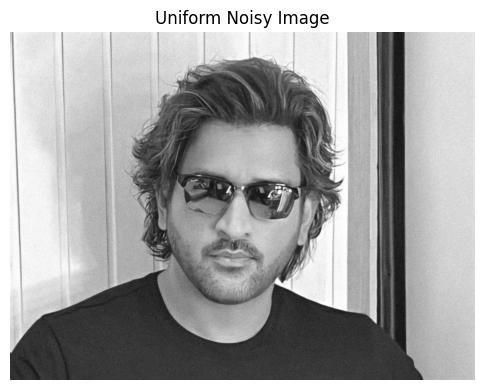

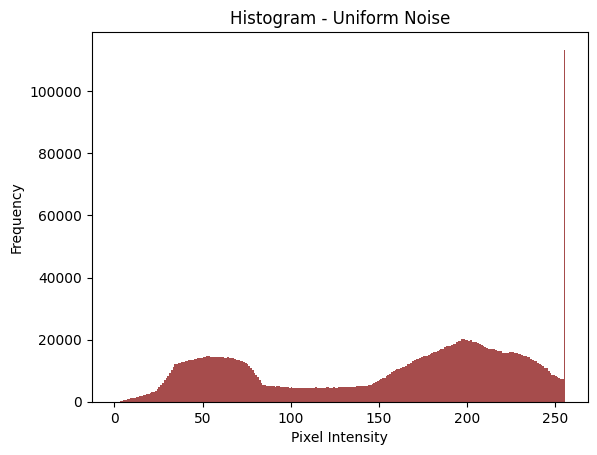

In [9]:
def add_uniform_noise(image, low=0, high=50):
    noise = np.random.uniform(low, high, image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)
uniform_noisy_image = add_uniform_noise(blurred_image)

plt.figure(figsize=(6, 6))
plt.imshow(uniform_noisy_image, cmap='gray')
plt.title("Uniform Noisy Image")
plt.axis("off")
plt.show()

plt.hist(uniform_noisy_image.ravel(), bins=256, range=[0, 256], color='maroon', alpha=0.7)
plt.title("Histogram - Uniform Noise")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


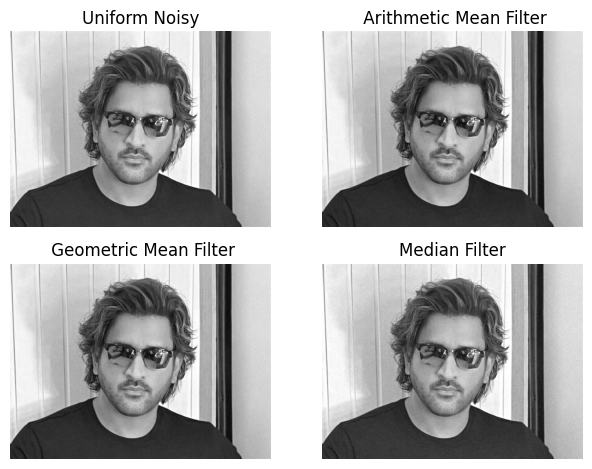

In [11]:
arithmetic1 = arithmetic_mean_filter(uniform_noisy_image,kernel_size=3)

geometric1 = geometric_mean_filter(uniform_noisy_image,kernel_size=3)

median_filtered1 = median_filter(uniform_noisy_image, kernel_size=3)

plt.subplot(2,2,1)
plt.imshow(uniform_noisy_image,cmap='gray')
plt.title("Uniform Noisy")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(arithmetic1,cmap='gray')
plt.title(" Arithmetic Mean Filter")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(geometric1,cmap='gray')
plt.title(" Geometric Mean Filter")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(median_filtered1,cmap='gray')
plt.title("Median Filter")
plt.axis("off")
plt.tight_layout()
plt.show()